# Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pathlib
import requests
from bs4 import BeautifulSoup
import random
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# URL da vítima
url = "https://www.gov.br/saude/pt-br/assuntos/noticias?b_start:int=1500"

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

In [ ]:
response = requests.get(url, headers=headers)
response
# <Response [200]> -> requisição foi bem-sucedida

<Response [200]>

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
#soup

In [ ]:
# Exibe o html como texto
#print(soup.get_text())

In [ ]:
# Localizando o bloco com o id "textoMateria"
bloco_noticias = soup.find_all("article", class_="tileItem")
#print(bloco_noticias)

In [ ]:
links = [bloco.find("a", class_="summary url")["href"] for bloco in bloco_noticias]


In [ ]:
links

['https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/secretario-de-atencao-especializada-visita-policlinica-modelo-no-ceara',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/brasil-e-colombia-reafirmam-estrategias-conjuntas-para-a-cooperacao-em-saude',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/moradores-do-complexo-da-mare-participam-de-oficina-de-inovacao-em-saude-digital',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/ministerio-da-saude-e-google-anunciam-parceria-para-facilitar-acesso-a-informacoes-sobre-postos-de-vacinacao',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/ministerio-da-saude-recomenda-ampliacao-do-publico-da-vacina-da-dengue',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/coloquio-com-diversos-especialistas-debate-o-atual-cenario-da-dengue-no-pais',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/saude-orienta-gestores-de-pernambuco-sobre-a-reconstrucao-da-saude-d

## Acessando as notícias

In [ ]:
links = [link for link in links if "/assuntos/noticias" in link]

for link in links:
    print(link)

https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/secretario-de-atencao-especializada-visita-policlinica-modelo-no-ceara
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/brasil-e-colombia-reafirmam-estrategias-conjuntas-para-a-cooperacao-em-saude
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/moradores-do-complexo-da-mare-participam-de-oficina-de-inovacao-em-saude-digital
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/ministerio-da-saude-e-google-anunciam-parceria-para-facilitar-acesso-a-informacoes-sobre-postos-de-vacinacao
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/ministerio-da-saude-recomenda-ampliacao-do-publico-da-vacina-da-dengue
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/coloquio-com-diversos-especialistas-debate-o-atual-cenario-da-dengue-no-pais
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/saude-orienta-gestores-de-pernambuco-sobre-a-reconstrucao-da-saude-da-familia
https://www.gov.

## Testando apenas uma notícia

In [ ]:
full_url =  links[1]  # Construindo a URL completa
response = requests.get(full_url, headers=headers)

In [ ]:
full_url

'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/brasil-e-colombia-reafirmam-estrategias-conjuntas-para-a-cooperacao-em-saude'

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
#print(soup.get_text(separator="\n").strip())

## Extraindo as covariáveis das notícias

In [ ]:
# Extraindo o título
title = soup.find("meta", property="og:title")["content"]

# Extraindo a descrição
description = soup.find("meta", attrs={"name": "description"})["content"]

#Extraindo o subtítulo
subtitle = soup.find("p", property="rnews:alternativeHeadline").get_text()

# Extraindo a categoria
categoria = soup.find("div", id="form-widgets-categoria").get_text(strip=True)

#Extraindo o nome da pessoa que escreveu a matéria (vai aparecer de onde é: Ministério da Saúde)
nome_autora = soup.find("div", property="rnews:articleBody").find_all("p")[-1]

# Exibindo os resultados
print("Título:", title)
print("Sub-Título:", subtitle)
print("Descrição:", description)
print("Categoria:", categoria)
print("Autora:", nome_autora)


Título: Brasil e Colômbia reafirmam estratégias conjuntas para a cooperação em saúde
Sub-Título: PARCERIA FORTALECIDA
Descrição: Declaração conjunta entre os dois países foi assinada em visita do presidente Lula ao país vizinho. A ministra da Saúde, Nísia Trindade, participou da comitiva
Categoria: Saúde e Vigilância Sanitária
Autora: <p><em>Ministério da Saúde </em></p>


In [ ]:
tags = []
try:
  div_tags = soup.find("div", class_="column").find("div", id="category")
  links_tags = div_tags.find_all("a", class_="link-category")
  tags = [link.get_text() for link in links_tags] if link else ""
except AttributeError:
  tags = None  # tive que usar try e except para o código funcionar quando leio várias notícias, pois na notícia 540 ele não tinha identificado tags


In [ ]:
tags

['relações exteriores', 'saúde indígena', 'cooperação em saúde', 'colômbia']

In [ ]:
data_publicacao = soup.find("span", class_="documentPublished")
print(data_publicacao)
data_texto = data_publicacao.find("span", class_="value").text.strip()
data_formatada = data_texto.split(' ')[0]
print(data_formatada)

<span class="documentPublished">
<span>Publicado em</span>
<!-- TODO: Criar no arquivo de tradução uma máscara para a data aparecer no seguinte formato:
             PT_BR: 15/10/2019 às 14:01
             EN   : 10/15/2019 at 14:01
        -->
<span class="value">18/04/2024 16h22</span>
</span>
18/04/2024


In [ ]:
#texto da matéria e autora da matéria
article_body = soup.find("div", property="rnews:articleBody")
paragraphs = article_body.find_all("p")
autora = paragraphs[-1].get_text(strip=True)
print(autora)

paragraphs.pop() # Exclui a última linha: Vanessa RodriguesMinistério da Saúde (correspondente a autora)
texto_materia = "\n\n".join(p.get_text(strip=True) for p in paragraphs)

#print(texto_materia)

Ministério da Saúde


In [ ]:
informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "subtitulo": subtitle,
        "categoria": categoria,
        "autora": autora,
        "tags": tags,
        "data_publi": data_formatada,
        "texto": texto_materia
    }

In [ ]:
informacoes

{'url': 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/brasil-e-colombia-reafirmam-estrategias-conjuntas-para-a-cooperacao-em-saude',
 'titulo': 'Brasil e Colômbia reafirmam estratégias conjuntas para a cooperação em saúde',
 'descricao': 'Declaração conjunta entre os dois países foi assinada em visita do presidente Lula ao país vizinho. A ministra da Saúde, Nísia Trindade, participou da comitiva',
 'subtitulo': 'PARCERIA FORTALECIDA',
 'categoria': 'Saúde e Vigilância Sanitária',
 'autora': 'Ministério da Saúde',
 'tags': ['relações exteriores',
  'saúde indígena',
  'cooperação em saúde',
  'colômbia'],
 'data_publi': '18/04/2024',
 'texto': 'Brasil e Colômbia reafirmaram a importância de trabalhar em conjunto para aprofundar a cooperação em questões relacionadas à saúde. O fortalecimento do compromisso foi ratificado durante agenda do presidente brasileiro, Luiz Inácio Lula da Silva, com o presidente do país vizinho, Gustavo Petro. O encontro ocorreu, na quarta-feira (

In [ ]:
numero_paginas = 15*140
links_noticias = []

for p in range(0, numero_paginas , 15):
    url = f"https://www.gov.br/saude/pt-br/assuntos/noticias?b_start:int={p}"
    response = requests.get(url, headers=headers)

    print(p, response)

    soup = BeautifulSoup(response.text, "html.parser")
    bloco_noticias = soup.find_all("article", class_="tileItem")

    links = [bloco.find("a", class_="summary url")["href"] for bloco in bloco_noticias]
    links = [link for link in links if "/assuntos/noticias" in link]

    links_noticias += links

    # Esperar alguns segundos antes de ir para a próxima página
    tempo_espera = random.uniform(0, 0.01)
    time.sleep(tempo_espera)

0 <Response [200]>
15 <Response [200]>
30 <Response [200]>
45 <Response [200]>
60 <Response [200]>
75 <Response [200]>
90 <Response [200]>
105 <Response [200]>
120 <Response [200]>
135 <Response [200]>
150 <Response [200]>
165 <Response [200]>
180 <Response [200]>
195 <Response [200]>
210 <Response [200]>
225 <Response [200]>
240 <Response [200]>
255 <Response [200]>
270 <Response [200]>
285 <Response [200]>
300 <Response [200]>
315 <Response [200]>
330 <Response [200]>
345 <Response [200]>
360 <Response [200]>
375 <Response [200]>
390 <Response [200]>
405 <Response [200]>
420 <Response [200]>
435 <Response [200]>
450 <Response [200]>
465 <Response [200]>
480 <Response [200]>
495 <Response [200]>
510 <Response [200]>
525 <Response [200]>
540 <Response [200]>
555 <Response [200]>
570 <Response [200]>
585 <Response [200]>
600 <Response [200]>
615 <Response [200]>
630 <Response [200]>
645 <Response [200]>
660 <Response [200]>
675 <Response [200]>
690 <Response [200]>
705 <Response [200]>


In [ ]:
# links_noticias = links_noticias[1:] # a primeira

In [228]:
# links_noticias[2018:2100]


In [230]:
# Diretório onde os arquivos serão salvos
data_dir = pathlib.Path("data")
data_dir.mkdir(parents=True, exist_ok=True)  # Garante que o diretório será criado, se necessário

# se não encontrar nenhuma info assuma valor nulo
for i, link in enumerate(links_noticias[2018:2100]):
    full_url = link
    response = requests.get(full_url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    # Extração segura dos dados
    title = soup.find("meta", property="og:title")
    title = title["content"] if title else ""

    description = soup.find("meta", attrs={"name": "description"})
    description = description["content"] if description else ""

    subtitle = soup.find("p", property="rnews:alternativeHeadline")
    subtitle = subtitle.get_text() if subtitle else ""

    categoria = soup.find("div", id="form-widgets-categoria")
    categoria = categoria.get_text(strip=True) if categoria else ""

    tags = []
    try:
      div_tags = soup.find("div", class_="column").find("div", id="category")
      links_tags = div_tags.find_all("a", class_="link-category")
      tags = [link.get_text() for link in links_tags] if link else ""
    except AttributeError:
      tags = None

    data_publicacao = soup.find("span", class_="documentPublished")
    if data_publicacao:
      data_texto = data_publicacao.find("span", class_="value").text.strip() if data_publicacao.find("span", class_="value") else ""
      data_formatada = data_texto.split(' ')[0] if data_texto else ""
    else:
      data_formatada = ""

    materia = soup.find("div", property="rnews:articleBody")
    texto_materia = ""

    if materia:  # Se materia contém algum valor
      texto = materia.find_all("p")  # Encontra todos os parágrafos
      if texto:  # Verifica se a lista 'texto' não está vazia
          nome_autora = texto[-1].get_text(strip=True)  # A última autora é no último parágrafo
          texto.pop()  # Remove o último parágrafo, se necessário
          texto_materia = "\n\n".join(p.get_text(strip=True) for p in texto)  # Junta os textos dos parágrafos restantes

      else:
          nome_autora = ""  # Se não houver parágrafos, nome_autora ficará vazio
          texto_materia = ""


    # #texto da matéria e autora da matéria
    # article_body = soup.find("div", property="rnews:articleBody")
    # paragraphs = article_body.find_all("p")
    # nome_autora = paragraphs[-1].get_text(strip=True) if nome_autora else ""
    # paragraphs.pop() # Exclui a última linha
    # texto_materia = "\n\n".join(p.get_text(strip=True) for p in paragraphs) if texto_materia else ""

    # Estrutura do dicionário com informações extraídas
    informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "subtitulo": subtitle,
        "categoria": categoria,
        "autora": nome_autora,
        "tags": tags,
        "data_publi": data_formatada,
        "texto": texto_materia
    }

    filename = f"noticia_{i+2018}.json"
    file_path = data_dir / filename

    # Escreve as informações no arquivo JSON
    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)

    # Exibir o caminho no formato do Windows
    print(f"Arquivo salvo: {file_path.resolve()}")

    # Aguarda antes do próximo request para evitar sobrecarregar o servidor
    tempo_espera = random.uniform(0, 0.5)
    time.sleep(tempo_espera)


Arquivo salvo: /content/data/noticia_2018.json
Arquivo salvo: /content/data/noticia_2019.json
Arquivo salvo: /content/data/noticia_2020.json
Arquivo salvo: /content/data/noticia_2021.json
Arquivo salvo: /content/data/noticia_2022.json
Arquivo salvo: /content/data/noticia_2023.json
Arquivo salvo: /content/data/noticia_2024.json
Arquivo salvo: /content/data/noticia_2025.json
Arquivo salvo: /content/data/noticia_2026.json
Arquivo salvo: /content/data/noticia_2027.json
Arquivo salvo: /content/data/noticia_2028.json
Arquivo salvo: /content/data/noticia_2029.json
Arquivo salvo: /content/data/noticia_2030.json
Arquivo salvo: /content/data/noticia_2031.json
Arquivo salvo: /content/data/noticia_2032.json
Arquivo salvo: /content/data/noticia_2033.json
Arquivo salvo: /content/data/noticia_2034.json
Arquivo salvo: /content/data/noticia_2035.json
Arquivo salvo: /content/data/noticia_2036.json
Arquivo salvo: /content/data/noticia_2037.json
Arquivo salvo: /content/data/noticia_2038.json
Arquivo salvo

In [231]:
#Salvar arquivo para meu PC pessoal
import shutil
from google.colab import files

# Caminho da pasta que você quer baixar
folder_path = "/content/data"

# Caminho do arquivo zip que será criado
zip_path = "/content/data.zip"

# Compactar a pasta em um arquivo .zip
shutil.make_archive(folder_path, 'zip', folder_path)


files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Análise das notícias coletadas

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pathlib
from datetime import datetime
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict, Counter

In [232]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
# Caminho da pasta com os arquivos JSON
data_dir = pathlib.Path(r"/content/drive/MyDrive/10º SEMESTRE/LABORATORIO/Atividade 4/data")

# Contador para as tags
tag_counter = {}

# Abrindo e processando os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        tags = data.get("tags", [])  # Obtém a lista de tags
        if tags:  # Verifica se tags não é None ou uma lista vazia
            for tag in tags:
                if tag in tag_counter:
                    tag_counter[tag] += 1
                else:
                    tag_counter[tag] = 1

In [236]:
data

{'url': 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/julho/mapa-colaborativo-ganhara-plataforma-online-e-reunira-iniciativas-para-fortalecer-o-sus',
 'titulo': 'Mapa Colaborativo ganhará plataforma online e reunirá iniciativas para fortalecer o SUS',
 'descricao': 'Ministério da Saúde, CNS e Fiocruz lançarão plataforma Wiki para conectar saberes e práticas de movimentos sociais em todo o país',
 'subtitulo': 'SAÚDE POPULAR',
 'categoria': 'Saúde e Vigilância Sanitária',
 'autora': 'Ministério da Saúde',
 'tags': ['secretaria executiva',
  'saúde popular',
  'participação social',
  'wikipédia'],
 'data_publi': '12/07/2024',
 'texto': 'Construir um SUS mais forte e democrático exige a participação de todos. Com esse objetivo, o Ministério da Saúde, em parceria com o Conselho Nacional de Saúde (CNS) e a Fundação Oswaldo Cruz (Fiocruz), avança na construção do Mapa Colaborativo dos Movimentos Sociais em Saúde (MapaMovSaúde). Nos dias 4 e 5 de julho, representantes das instituiçõ

## Tags mais frequentes das notícias do Ministério da Saúde

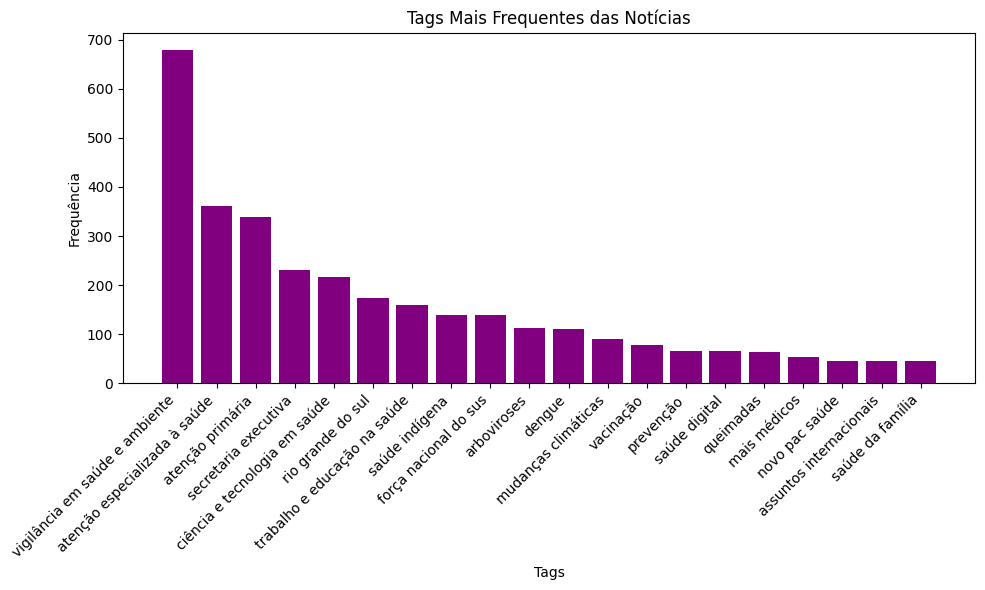

In [241]:
# Criando o dicionário com as tags e suas contagens
tag_count_dict = dict(sorted(tag_counter.items(), key=lambda x: x[1], reverse=True))

# Selecionando as tags mais comuns
top_tags = list(tag_count_dict.items())[:20]  # Top 20 tags mais frequentes

# Separando os dados para o gráfico
labels, values = zip(*top_tags)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(labels, values,color='purple')
plt.xlabel("Tags")
plt.ylabel("Frequência")
plt.title("Tags Mais Frequentes das Notícias")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Número de notícias por mês coletadas

In [242]:
dates = []

# Lendo os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with open(json_file, "r", encoding="utf-8") as f:
        entry = json.load(f)
        date_str = entry.get("data_publi", "")  # Data no formato "dd/mm/yyyy"
        if date_str:
            try:
                # Converter data no formato "dd/mm/yyyy" para datetime
                date = datetime.strptime(date_str, "%d/%m/%Y")
                month = date.strftime("%Y-%m")  # Extrair ano e mês (ex: 2024-11)
                dates.append(month)
            except ValueError:
                print(f"Data inválida no arquivo: {json_file} ({date_str})")


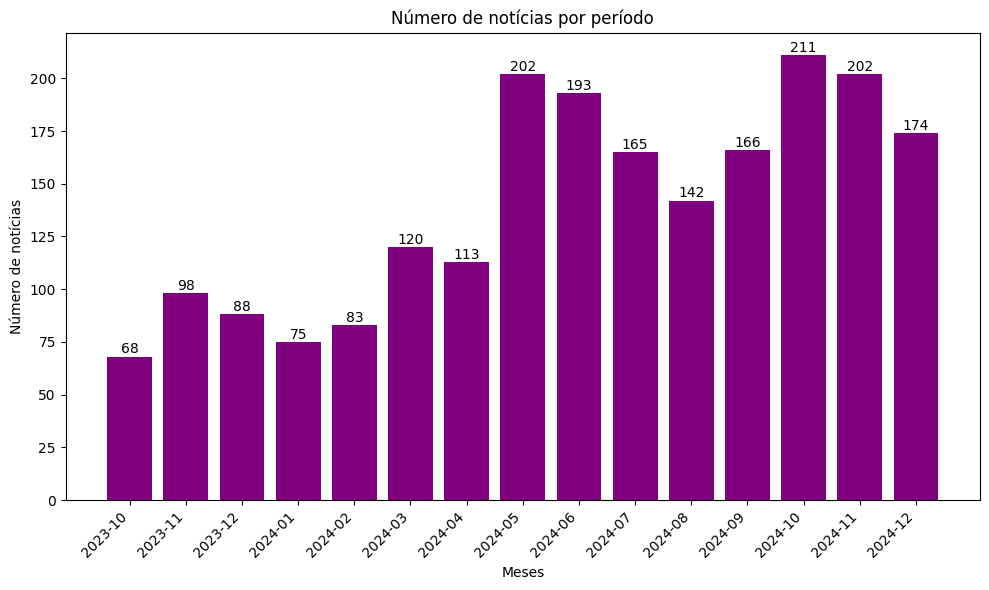

In [243]:
meses_counts = pd.Series(dates).value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = plt.bar(meses_counts.index, meses_counts.values, color='purple')

#rótulos
for i, count in enumerate(meses_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel("Meses")
plt.ylabel("Número de notícias")
plt.title("Número de notícias por período")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [245]:
len(dates) #conferindooo

2100

## Quantidade de Subtítulos e Autoras Mais frequentes de outubro/2023 a dezembro de 2024

In [310]:
subtitulo_counter = Counter()
autoras_counter = Counter()


for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)

        subtitulo = data.get("subtitulo", None)  #
        if subtitulo:  # Verifica se a subtitulo não é None
          subtitulo_counter[subtitulo] += 1  # aumenta a contagem da subtitulo

        # Contar autoras
        autora = data.get("autora", "").strip()  # Obtém o nome da autora (ou vazio se não existir)
        if autora:
            autoras_counter[autora] += 1  # aumenta a contagem da autora

# resultados para subtitulo
#Lembrando que temos 1673 matérias no conjunto de dados
print(f"Total de subtitulo únicas de out/23 a dezembro de 2024: {len(subtitulo_counter)}")
print(f"subtitulo mais frequentes de out/23 a dezembro de 2024:\n{subtitulo_counter.most_common(10)}")

# resultados para autoras
print(f"Total de autoras únicas de out/23 a dezembro de 2024: {len(autoras_counter)}")
print(f"Top 10 Autoras mais frequentes de out/23 a dezembro de 2024:\n{autoras_counter.most_common(10)}")


Total de subtitulo únicas de out/23 a dezembro de 2024: 847
subtitulo mais frequentes de out/23 a dezembro de 2024:
[('RIO GRANDE DO SUL', 155), ('SAÚDE INDÍGENA', 66), ('AGENDA INTERNACIONAL', 33), ('COMBATE AO MOSQUITO', 32), ('ARBOVIROSES', 25), ('QUEIMADAS', 25), ('VIGILÂNCIA', 24), ('HOSPITAIS FEDERAIS', 23), ('NOVO PAC SAÚDE', 21), ('QUALIFICAÇÃO', 21)]
Total de autoras únicas de out/23 a dezembro de 2024: 286
Top 10 Autoras mais frequentes de out/23 a dezembro de 2024:
[('Ministério da Saúde', 678), ('Edjalma BorgesMinistério da Saúde', 135), ('Otávio AugustoMinistério da Saúde', 134), ('Nathan VictorMinistério da Saúde', 114), ('Vanessa RodriguesMinistério da Saúde', 95), ('Ana FreireMinistério da Saúde', 84), ('João MoraesMinistério da Saúde', 59), ('Nadja Alves dos ReisMinistério da Saúde', 46), ('Tania MelloMinistério da Saúde', 27), ('Leidiane SouzaMinistério da Saúde', 26)]


* Vemos que os TOP 3 autores mais frequentes nas matérias foram o Ministério da Saúde, Edjalma Borges e Otávio Augusto
* Já os TOP 3 subtitulos mais frequentes foram RIO GRANDE DO SUL, SAUDE INDIGENA e AGENDA INTERNACIONAL

## TOP 3 autoras mais frequentes de acordo com a data

Obs: Para facilidade ao extrair os dados do site eu filtrei o nome da autora+de onde ela é (por ex: Edjalma BorgesMinistério da Saúde é a Edjalma Borges do Ministério da Saúde)

In [248]:
autoras_por_data = defaultdict(Counter)

for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        data_materia = data.get("data_publi", None)
        autora = data.get("autora", "").strip()
        date = datetime.strptime(data_materia, "%d/%m/%Y")
        mes = date.strftime("%Y-%m")  # Extrair
        if mes and autora:
            autoras_por_data[mes][autora] += 1


In [249]:
for data, counter in sorted(autoras_por_data.items()):  # Ordenar por data
    print(f"\nData: {data}")
    print("Top 3 autoras mais frequentes:")
    for autora, count in counter.most_common(3):  # Top 3 autoras por data
        print(f"{autora}: {count}")


Data: 2023-10
Top 3 autoras mais frequentes:
Ministério da Saúde: 33
Nathan VictorMinistério da Saúde: 5
Com informações da Secretaria de Comunicação Social da Presidência da República: 4

Data: 2023-11
Top 3 autoras mais frequentes:
Ministério da Saúde: 56
Patrícia FiguerêdoMinistério da Saúde: 7
Roberta PaolaMinistério da Saúde: 5

Data: 2023-12
Top 3 autoras mais frequentes:
Ministério da Saúde: 47
Nathan VictorMinistério da Saúde: 10
Nadja Alves dos ReisMinistério da Saúde: 3

Data: 2024-01
Top 3 autoras mais frequentes:
Ministério da Saúde: 43
Nathan VictorMinistério da Saúde: 11
Com informações da Secretaria de Comunicação Social da Presidência: 3

Data: 2024-02
Top 3 autoras mais frequentes:
Ministério da Saúde: 49
Nathan VictorMinistério da Saúde: 5
Com informações da Secretaria de Comunicação Social da Presidência: 3

Data: 2024-03
Top 3 autoras mais frequentes:
Ministério da Saúde: 59
Nathan VictorMinistério da Saúde: 12
Janaína MichalskiMinistério da Saúde: 9

Data: 2024-04

## Analisar os subtítulos mais frequentes por data

In [250]:
subtitulo_data = []

for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        subtitulos = data.get("subtitulo", [])
        date_str = data.get("data_publi", "")  #formato "dd/mm/yyyy"
        if date_str:
            try:
                #Converter o formato "dd/mm/yyyy" para datetime
                date = datetime.strptime(date_str, "%d/%m/%Y")
                mes = date.strftime("%Y-%m")  # Extrair
                if subtitulos: #se subtitulo n é none
                      subtitulo_data.append({"mes": mes, "subtitulo": subtitulos})
            except ValueError:
                print(f"Data inválida no arquivo {json_file}: {date_str}")


df = pd.DataFrame(subtitulo_data)
freq_datas_subtitulo = df.groupby(["mes", "subtitulo"]).size().reset_index(name="frequencia")
freq_datas_subtitulo = freq_datas_subtitulo.sort_values(by=["mes", "frequencia"], ascending=[True, False])
print(freq_datas_subtitulo)

          mes                 subtitulo  frequencia
54    2023-10           VOLTANDO EM PAZ           4
16    2023-10           EQUIDADE NO SUS           3
44    2023-10  SAÚDE DA POPULAÇÃO NEGRA           3
8     2023-10               CAPACITAÇÃO           2
19    2023-10        GESTÃO DO TRABALHO           2
...       ...                       ...         ...
1394  2024-12                 VACINAÇÃO           1
1395  2024-12               VALORIZAÇÃO           1
1398  2024-12                  ­­EDITAL           1
1399  2024-12               ­­PREVENÇÃO           1
1400  2024-12              ­­PROADI-SUS           1

[1401 rows x 3 columns]


          mes             subtitulo  frequencia
54    2023-10       VOLTANDO EM PAZ           4
92    2023-11        NOVO PAC SAÚDE           8
136   2023-12      ATENÇÃO PRIMÁRIA           3
212   2024-01   COMBATE AO MOSQUITO           6
277   2024-02   COMBATE AO MOSQUITO          15
339   2024-03   COMBATE AO MOSQUITO           7
474   2024-04        NOVO PAC SAÚDE           4
564   2024-05     RIO GRANDE DO SUL          92
672   2024-06     RIO GRANDE DO SUL          55
800   2024-07         SAÚDE 71 ANOS           8
839   2024-08       CHAMADA PÚBLICA           9
989   2024-09             QUEIMADAS          17
1025  2024-10  AGENDA INTERNACIONAL          19
1256  2024-11        SAÚDE INDÍGENA          17
1383  2024-12        SAÚDE INDÍGENA           8


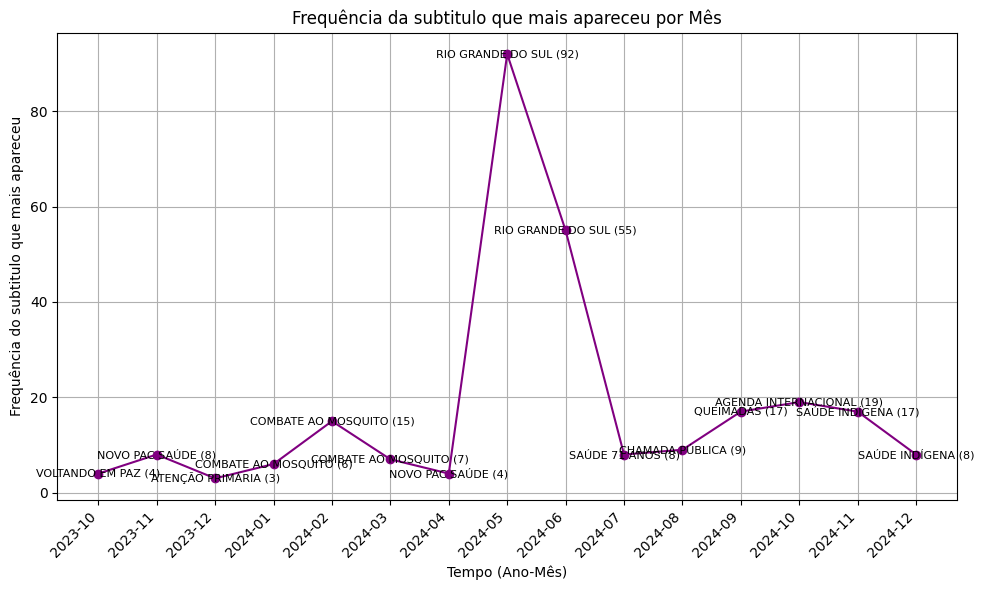

In [253]:
# Tags mais frequentes por Data
mais_freq_data = freq_datas_subtitulo.loc[freq_datas_subtitulo.groupby("mes")["frequencia"].idxmax()]
print(mais_freq_data)
plt.figure(figsize=(10, 6))
plt.plot(mais_freq_data["mes"], mais_freq_data["frequencia"], marker="o", linestyle="-", color="purple")
# rótulos
for i, count in enumerate(mais_freq_data["frequencia"]):
    plt.text(i, count, f"{mais_freq_data['subtitulo'].iloc[i]} ({count})", fontsize=8, ha="center", va="center")

plt.xlabel("Tempo (Ano-Mês)")
plt.ylabel("Frequência do subtitulo que mais apareceu")
plt.title("Frequência da subtitulo que mais apareceu por Mês")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()


* Nos tres primeiros meses de 2024 o foco era sobre dengue, por isso o subtitulo mais frequente foi "COMBATE AO MOSQUITO"
* Atenção para Maio de 2024: tragédia do Rio Grande do Sul e queimadas em setembro (teve várias queimadas em SP :( )



##Analisar as Tags mais frequentes por data

In [252]:
tags_data = []

for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        tags = data.get("tags", [])
        date_str = data.get("data_publi", "")
        if date_str:
            try:
                date = datetime.strptime(date_str, "%d/%m/%Y")
                mes = date.strftime("%Y-%m")
                if tags:
                  for tag in tags:
                      tags_data.append({"mes": mes, "tag": tag})
            except ValueError:
                print(f"Data inválida no arquivo {json_file}: {date_str}")

df = pd.DataFrame(tags_data)
freq_datas_tags = df.groupby(["mes", "tag"]).size().reset_index(name="frequencia")
freq_datas_tags = freq_datas_tags.sort_values(by=["mes", "frequencia"], ascending=[True, False])

print(freq_datas_tags)


          mes                             tag  frequencia
138   2023-10  vigilância em saúde e ambiente          15
9     2023-10                atenção primária          14
8     2023-10   atenção especializada à saúde           8
131   2023-10    trabalho e educação na saúde           8
27    2023-10   ciência e tecnologia em saúde           6
...       ...                             ...         ...
3545  2024-12          vigilância nutricional           1
3546  2024-12                         vigitel           1
3547  2024-12             violência de gênero           1
3548  2024-12                vivências no sus           1
3551  2024-12                           ética           1

[3552 rows x 3 columns]


          mes                             tag  frequencia
138   2023-10  vigilância em saúde e ambiente          15
333   2023-11  vigilância em saúde e ambiente          24
508   2023-12  vigilância em saúde e ambiente          25
655   2024-01  vigilância em saúde e ambiente          26
821   2024-02  vigilância em saúde e ambiente          36
1043  2024-03  vigilância em saúde e ambiente          44
1259  2024-04  vigilância em saúde e ambiente          41
1463  2024-05               rio grande do sul         107
1535  2024-06   atenção especializada à saúde          61
2069  2024-07  vigilância em saúde e ambiente          43
2332  2024-08  vigilância em saúde e ambiente          32
2588  2024-09  vigilância em saúde e ambiente          63
2896  2024-10  vigilância em saúde e ambiente          75
3243  2024-11  vigilância em saúde e ambiente          64
3543  2024-12  vigilância em saúde e ambiente          72


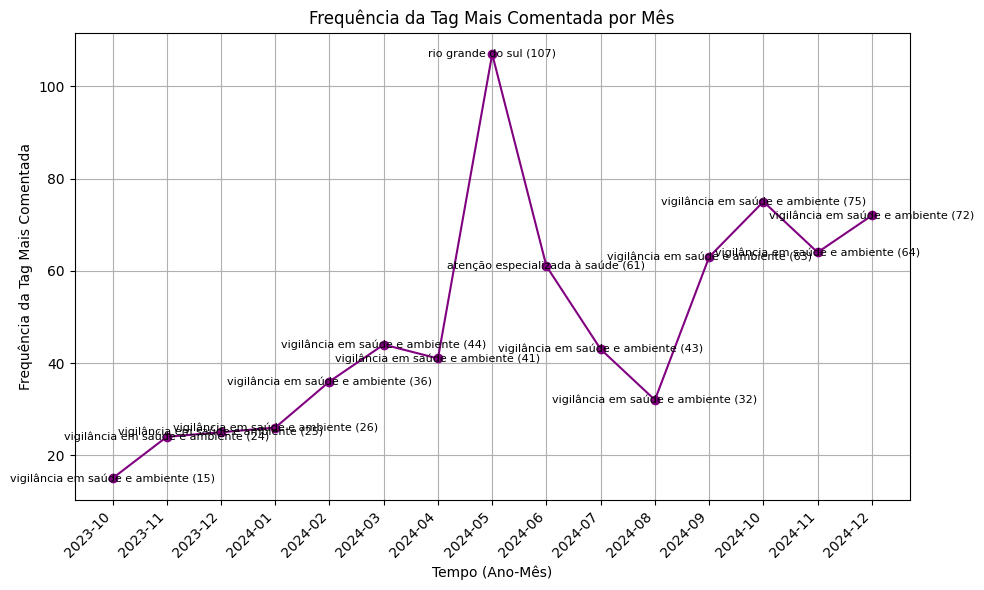

In [255]:
mais_freq_data = freq_datas_tags.loc[freq_datas_tags.groupby("mes")["frequencia"].idxmax()]
print(mais_freq_data)

plt.figure(figsize=(10, 6))
plt.plot(mais_freq_data["mes"], mais_freq_data["frequencia"], marker="o", linestyle="-", color="purple")

for i, count in enumerate(mais_freq_data["frequencia"]):
    plt.text(i, count, f"{mais_freq_data['tag'].iloc[i]} ({count})", fontsize=8, ha="center", va="center")

plt.xlabel("Tempo (Ano-Mês)")
plt.ylabel("Frequência da Tag Mais Comentada")
plt.title("Frequência da Tag Mais Comentada por Mês")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()

## Analisando Similariedade Textual entre Subtítulos

No primeiro momento queremos apenas verificar quais subtítulos são próximos entre si na escrita, gramática, etc. Para tal usamos a função TfidfVectorizer() do Python na qual converte uma coleção de documentos brutos em uma matriz de recursos TF-IDF, uma matriz que releva a importancia das palavras em textos (mais infos em https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

## Inspiraçãp/Fonte: https://www.kaggle.com/code/rodmnzs/movies-recommendation-system e https://www.kaggle.com/code/doukanelik/content-based-recommendation-system

In [256]:
subtitulo = []

for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        subtitulo_text = data.get("subtitulo", "").strip()
        if subtitulo_text:  # verificar se subtítulo não estiver vazio
            subtitulo.append(subtitulo_text)

# Remover duplicatas
subtitulo_sem_dupli = list(set(subtitulo))
print(f"Total de subtítulos encontrados únicos: {len(subtitulo_sem_dupli)}")

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer(lowercase=True)
tfidf_matriz = vectorizer.fit_transform(subtitulo_sem_dupli) #Criando matriz a partir dos vetores das palavras de subtitulos sem repetições
print(tfidf_matriz)


Total de subtítulos encontrados únicos: 847
  (0, 508)	0.6783964895397788
  (0, 533)	0.7346959935783675
  (1, 702)	0.4880945833547064
  (1, 141)	0.8727907410713036
  (2, 611)	1.0
  (3, 257)	0.43050300619428633
  (3, 505)	0.5245714405093219
  (3, 424)	0.7345011677728345
  (4, 19)	1.0
  (5, 77)	0.635139586334551
  (5, 282)	0.7723973756239564
  (6, 296)	1.0
  (7, 693)	0.8294713412713135
  (7, 445)	0.5585492762591037
  (8, 350)	0.5919676754115515
  (8, 543)	0.8059617058321346
  (9, 584)	0.6563761145512736
  (9, 53)	0.754433824961854
  (10, 75)	0.6410231192676626
  (10, 724)	0.7675215700971251
  (11, 697)	0.7071067811865476
  (11, 3)	0.7071067811865476
  (12, 702)	0.30521655730112685
  (12, 16)	0.7072361241595732
  (12, 59)	0.6376989241272036
  :	:
  (836, 54)	0.6801633564743038
  (837, 5)	0.5545682052839938
  (837, 97)	0.5884106158492087
  (837, 6)	0.5884106158492087
  (838, 702)	0.522074526264081
  (838, 78)	0.8528998704573328
  (839, 205)	0.36044503847393194
  (839, 672)	0.67400543382627

## Agora iremos calcular similaridade entre as palavras para identificar quais são mais próximas!
 Para isso usamos a similaridade por cosseno, que avalia o cosseno do ângulo entre dois vetores. O valor varia de -1 a 1, e quanto mais próximo de 1, mais similares são os vetores. (Poderia usar outros tipos de similaridade como a Jaccard)

In [257]:
# Similaridade do cosseno
similaridade_matriz = cosine_similarity(X=tfidf_matriz,Y=tfidf_matriz)
similaridade_matriz

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.33625447,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33625447, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [258]:
# Criar DataFrame de similaridade
base_sim = pd.DataFrame(similaridade_matriz, index=subtitulo_sem_dupli, columns=subtitulo_sem_dupli)
base_sim.head(5)

,NOVO PAC,SAÚDE & CIÊNCIA,PROQUALI,EM NOVA IORQUE,ABRASCO,ATENDIMENTO ESPECIALIZADO,EXPANSÃO,SAIBA MAIS,GESTÃO PARTICIPATIVA,PRAZO AMPLIADO,...,BIÊNIO 2024-2026,ATENÇÃO À SAÚDE,CICLO DE RESPEITO,VALORIZAÇÃO,INCLUSÃO DIGITAL,DOENÇAS CRÔNICAS,NOVO PROGRAMA,COMBATE ÀS DESIGUALDADES,PROTEÇÃO ÀS MULHERES,TROCA DE INFORMAÇÕES
NOVO PAC,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.440075,0.0,0.0,0.0
SAÚDE & CIÊNCIA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.254822,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
PROQUALI,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
EM NOVA IORQUE,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
ABRASCO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Organizando o dataframe para ficar mais visual com a subtitulo, subtitulo mais similar e pontuação

In [259]:
subtitulos_similiares = []

for i, category in enumerate(base_sim.index):
    similaridades = base_sim.iloc[i].sort_values(ascending=False)

    if len(similaridades) > 1:
        similar_categories = similaridades.index[1]
        scores = similaridades.iloc[1]
        subtitulos_similiares.append({
            "subtitulo": category,
            "mais_similar": similar_categories,
            "pontuacao": scores
        })
        #print(f"'{category}' é mais semelhante a '{similar_categories}' de pontuação {scores:.2f}")

# Criando um DataFrame com as similaridades
df_similares = pd.DataFrame(subtitulos_similiares)
df_similares = df_similares.sort_values(by="pontuacao", ascending=False)

In [260]:
df_similares.head(5)

,subtitulo,mais_similar,pontuacao
656,PROADI-SUS,PROADI-SUS,1.0
393,HIV/AIDS,HIV E AIDS,1.0
282,JULHO AMARELO,JULHO AMARELO,1.0
371,EDUCAÇÃO E SAÚDE,SAÚDE & EDUCAÇÃO,1.0
113,Nota de pesar,Nota de Pesar,1.0


## Filtrar os Top 20 subtitulos mais similares em texto diferente do score 1 (pois serão subtitulos próximo de serem iguais, como JULHO AMARELO e julho amarelo)

                   subtitulo                 mais_similar  pontuacao
0                   NOVO PAC               NOVO PAC SAÚDE   0.939552
389                EM DEBATE              SAÚDE EM DEBATE   0.924800
702            SOLIDARIEDADE        SAÚDE & SOLIDARIEDADE   0.909215
178                 CUIDADOS             SAÚDE & CUIDADOS   0.895844
449                  CULTURA              SAÚDE + CULTURA   0.895844
665       SAÚDE & INFORMAÇÃO                   INFORMAÇÃO   0.895844
664                INDÚSTRIA            SAÚDE E INDÚSTRIA   0.895844
595       DE VOLTA PARA CASA              DE VOLTA À CASA   0.890568
368                AMPLIAÇÃO              AMPLIAÇÃO SAÚDE   0.890391
804    MAIS SAÚDE COM AGENTE             SAÚDE COM AGENTE   0.886828
44   SAÚDE & DESENVOLVIMENTO              DESENVOLVIMENTO   0.885461
342         SAÚDE E INOVAÇÃO                     INOVAÇÃO   0.885461
493                G20 SAÚDE                          G20   0.880935
270                 INCLUSÃO      

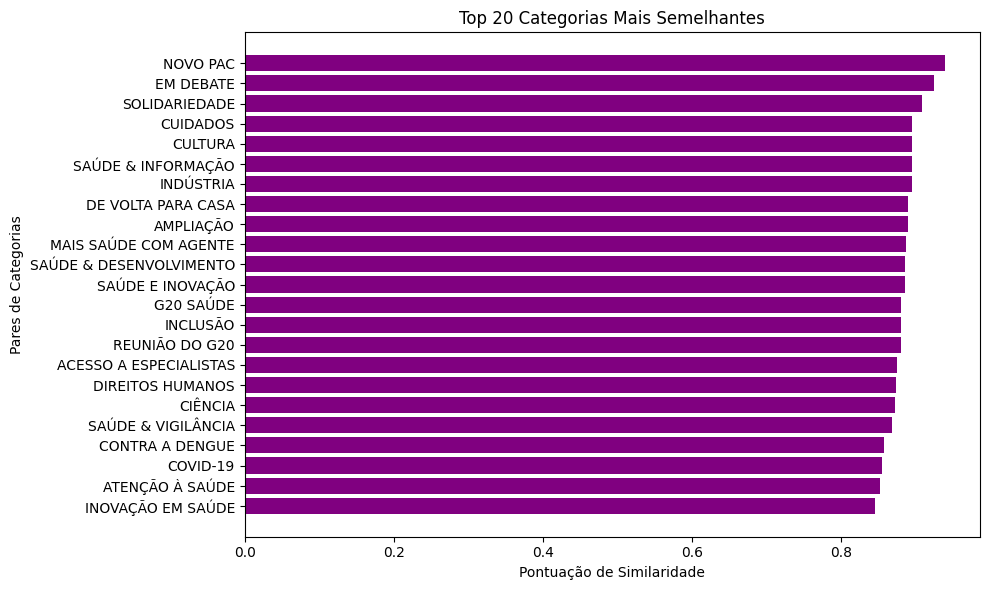

In [261]:
top20_subtitulos_similiares = df_similares[df_similares["pontuacao"] < 0.99].head(40)
# Para não ficar com linhas repetidas por exemplo:
# NOVO PAC                NOVO PAC SAÚDE   0.938633
# NOVO PAC SAÚDE          NOVO PAC   0.938633
# vou remover as duplicatas de acordo com os pares subtitulo+similar e pontuação

df_unique = (
    top20_subtitulos_similiares
    .assign(pares=top20_subtitulos_similiares[["subtitulo", "mais_similar"]].apply(frozenset, axis=1))  # Cria pares únicos
    .drop_duplicates(subset=["pares", "pontuacao"])  # Remove duplicatas baseadas no par e na pontuação
    .drop(columns=["pares"])  # Remove a coluna auxiliar
)

print(df_unique)

similar_categories = df_unique["subtitulo"]
scores = df_unique["pontuacao"]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.barh(similar_categories, scores, color='purple')
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Pares de Categorias")
plt.title("Top 20 Categorias Mais Semelhantes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Subtítulos mais semelhantes com base em Tags usando TfidfVectorizer e similaridade por cosseno

In [262]:
subtitulos_list = []
tags_list = []

# Ler os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        subtitulo = data.get("subtitulo", "").strip()
        tags = data.get("tags", [])
        if subtitulo and tags:  # Adicionar apenas se ambos subtítulo e tags não estiverem vazios
            subtitulos_list.append(subtitulo)
            tags_list.append(" ".join(tags))  # Transformar lista de tags em string

# print(subtitulos_list)
# print(tags_list)

In [263]:
# Vetorização com TF-IDF usando as tags como contexto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tags_list)  # Vetorizar com as tags
tfidf_matrix

<2092x1553 sparse matrix of type '<class 'numpy.float64'>'
	with 17454 stored elements in Compressed Sparse Row format>

In [266]:
# Similaridade do cosseno
similarity_matrix = cosine_similarity(X=tfidf_matrix,Y=tfidf_matrix)
similarity_matrix

array([[1.        , 0.        , 0.07879352, ..., 0.46235959, 0.        ,
        0.        ],
       [0.        , 1.        , 0.01149538, ..., 0.01649486, 0.16155813,
        0.01027338],
       [0.07879352, 0.01149538, 1.        , ..., 0.14560271, 0.01111997,
        0.00909451],
       ...,
       [0.46235959, 0.01649486, 0.14560271, ..., 1.        , 0.17613474,
        0.01304983],
       [0.        , 0.16155813, 0.01111997, ..., 0.17613474, 1.        ,
        0.00993788],
       [0.        , 0.01027338, 0.00909451, ..., 0.01304983, 0.00993788,
        1.        ]])

In [267]:
dataset_sim = pd.DataFrame(similarity_matrix, index=subtitulos_list, columns=subtitulos_list)
dataset_sim.head(5)

,NOVAS VAGAS,VACINAÇÃO,CRIANÇAS & ADOLESCENTES,A FAVOR DA PESQUISA,JULHO AMARELO,AUDIÊNCIA PÚBLICA,SAÚDE & CIÊNCIA,NOVO PAC SAÚDE,AÇÃO COORDENADA,CUIDADOS,...,CARAVANA FEDERATIVA,NOVO ESPAÇO,VACINAS SALVAM VIDAS,GRUPO DA TERRA,EM ALTA,SAÚDE INDÍGENA,MAIS SAÚDE COM AGENTE,NOVO EDITAL,SAÚDE INDÍGENA,SAÚDE POPULAR
NOVAS VAGAS,1.000000,0.000000,0.078794,0.000000,0.000000,0.0,0.000000,0.031176,0.024137,0.082946,...,0.0,0.020004,0.000000,0.0,0.000000,0.027108,0.061304,0.462360,0.000000,0.000000
VACINAÇÃO,0.000000,1.000000,0.011495,0.031536,0.092607,0.0,0.028810,0.025462,0.009857,0.000000,...,0.0,0.008169,0.202640,0.0,0.038053,0.011070,0.020097,0.016495,0.161558,0.010273
CRIANÇAS & ADOLESCENTES,0.078794,0.011495,1.000000,0.008552,0.008336,0.0,0.007813,0.058663,0.036693,0.096106,...,0.0,0.030409,0.008268,0.0,0.010320,0.041209,0.017791,0.145603,0.011120,0.009095
A FAVOR DA PESQUISA,0.000000,0.031536,0.008552,1.000000,0.022869,0.0,0.443504,0.018944,0.007333,0.000000,...,0.0,0.006078,0.022683,0.0,0.160292,0.008236,0.014952,0.012272,0.075425,0.007643
JULHO AMARELO,0.000000,0.092607,0.008336,0.022869,1.000000,0.0,0.217100,0.018465,0.007148,0.000000,...,0.0,0.005924,0.066610,0.0,0.027595,0.008028,0.014574,0.011962,0.009109,0.007450


In [268]:
pares_sim = []  # Lista para armazenar os pares de subtítulos semelhantes
for i, subtitulo in enumerate(dataset_sim.index):
    similarities = dataset_sim.iloc[i].sort_values(ascending=False)
    most_similar = similarities.index[1]  # Ignorar o próprio subtítulo
    similarity_score = similarities.iloc[1]
    pares_sim.append((subtitulo, most_similar, similarity_score))
    # print(f"'{subtitulo}' é mais semelhante a '{most_similar}' com pontuação {similarity_score:.2f}")


# Criar DataFrame com os pares semelhantes
tab = pd.DataFrame(pares_sim, columns=["Subtítulo", "Subtítulo Mais Semelhante", "Pontuação de Similaridade"])
tab = tab.sort_values(by="Pontuação de Similaridade", ascending=False).reset_index(drop=True)

In [269]:
tab.head(20)

,Subtítulo,Subtítulo Mais Semelhante,Pontuação de Similaridade
0,CONTRA O MOSQUITO,SAÚDE E EDUCAÇÃO,1.0
1,HOSPITAIS FEDERAIS,HOSPITAIS FEDERAIS,1.0
2,EQUIDADE EM SAÚDE,MAIS INCLUSÃO,1.0
3,SAÚDE E EDUCAÇÃO,SAÚDE E EDUCAÇÃO,1.0
4,SEMINÁRIO,MAIS INCLUSÃO,1.0
5,HOSPITAIS FEDERAIS,HOSPITAIS FEDERAIS,1.0
6,MAIS INCLUSÃO,MAIS INCLUSÃO,1.0
7,SAÚDE DO CAMPO,SAÚDE DO CAMPO,1.0
8,RIO GRANDE DO SUL,RIO GRANDE DO SUL,1.0
9,RIO GRANDE DO SUL,RIO GRANDE DO SUL,1.0


## Similaridade com IMUNIZAÇÃO

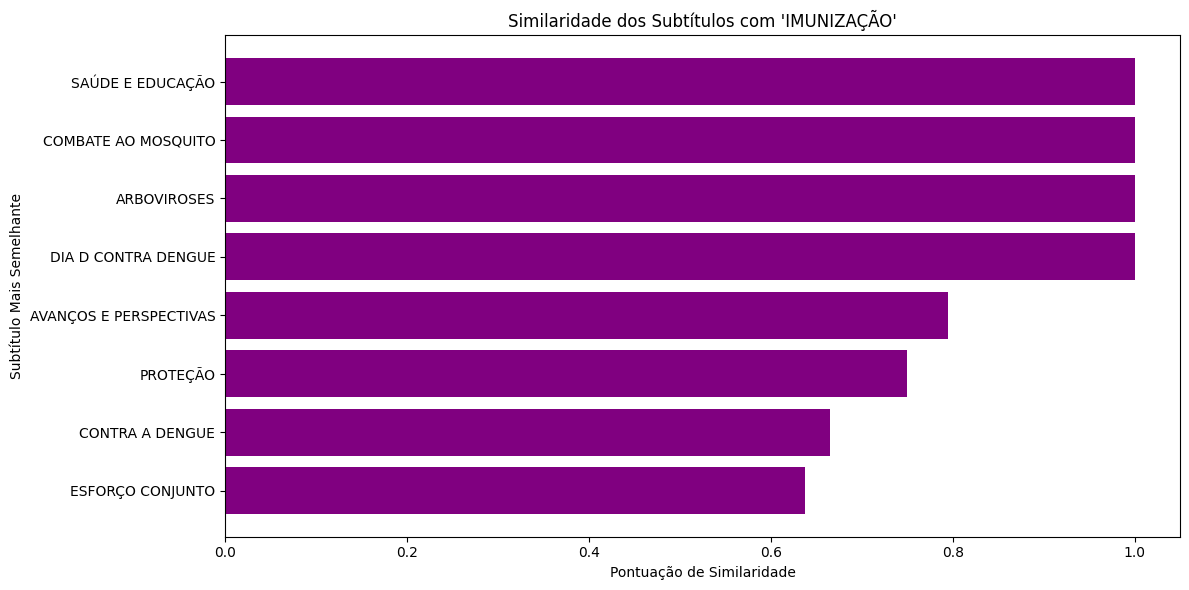

In [306]:
filtered_df = tab[tab['Subtítulo']=='IMUNIZAÇÃO']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'IMUNIZAÇÃO'")
plt.gca().invert_yaxis()  # Inverter a ordem dos subtítulos no eixo y para melhor visualização
plt.tight_layout()
plt.show()

## Similariedade com CONTRA O MOSQUITO

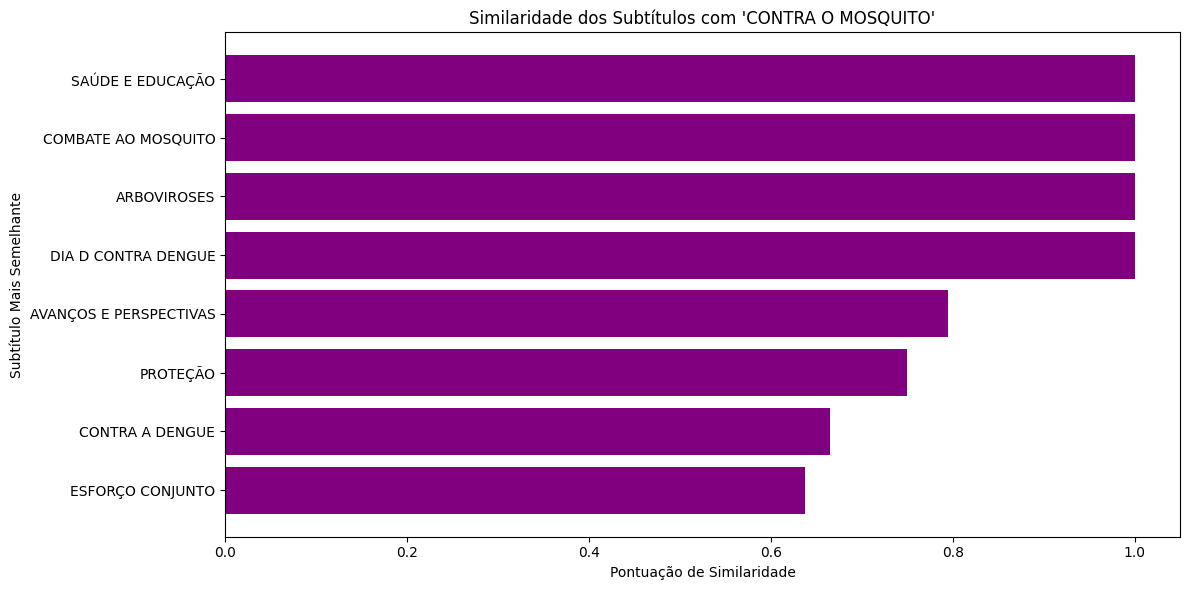

In [307]:
filtered_df = tab[tab['Subtítulo']=='CONTRA O MOSQUITO']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'CONTRA O MOSQUITO'")
plt.gca().invert_yaxis()  # Inverter a ordem dos subtítulos no eixo y para melhor visualização
plt.tight_layout()
plt.show()

## Similaridade com RIO GRANDE DO SUL

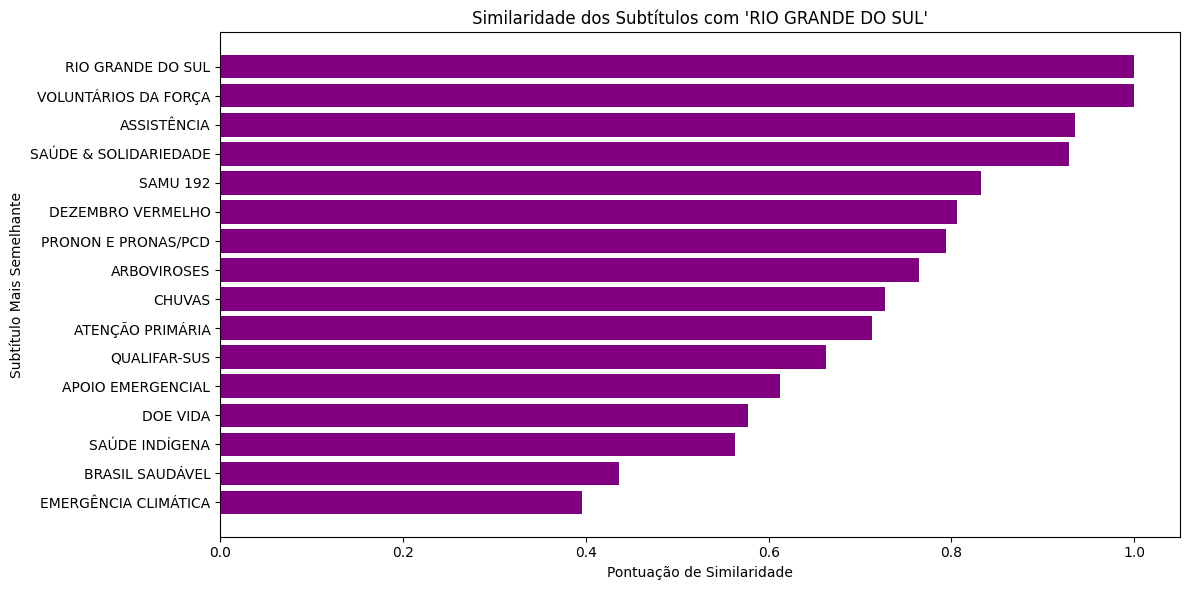

In [271]:
filtered_df = tab[tab['Subtítulo']=='RIO GRANDE DO SUL']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'RIO GRANDE DO SUL'")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Similaridade com MALÁRIA


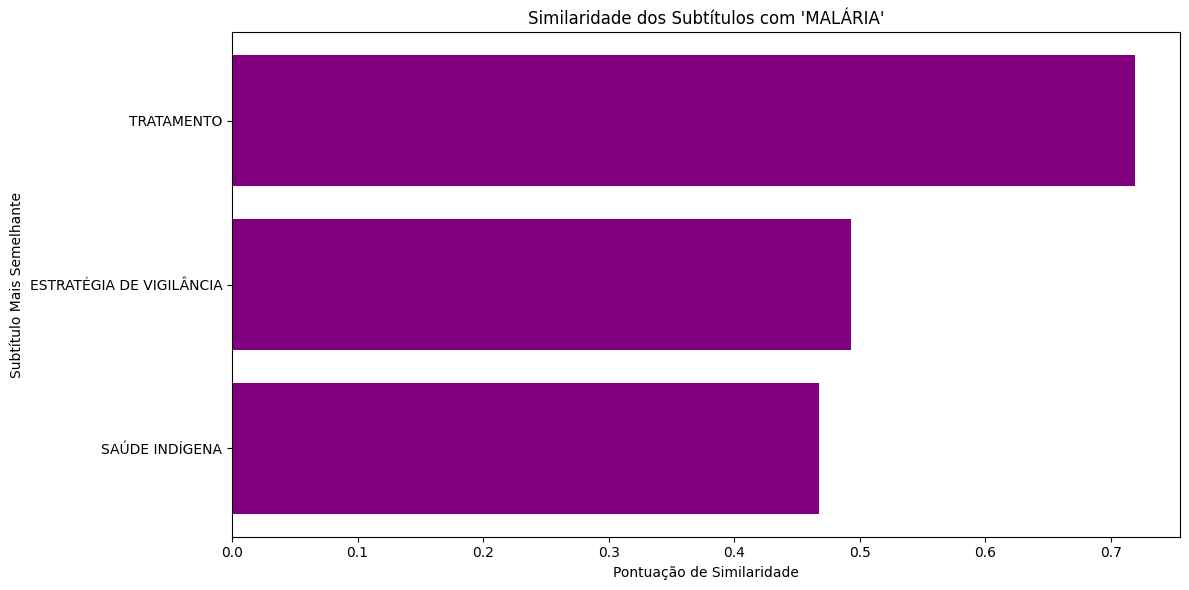

In [272]:
filtered_df = tab[tab['Subtítulo']=='MALÁRIA']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'MALÁRIA'")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Similaridade com INOVAÇÃO
PNAN: Política Nacional de Alimentação e Nutrição - PNAN

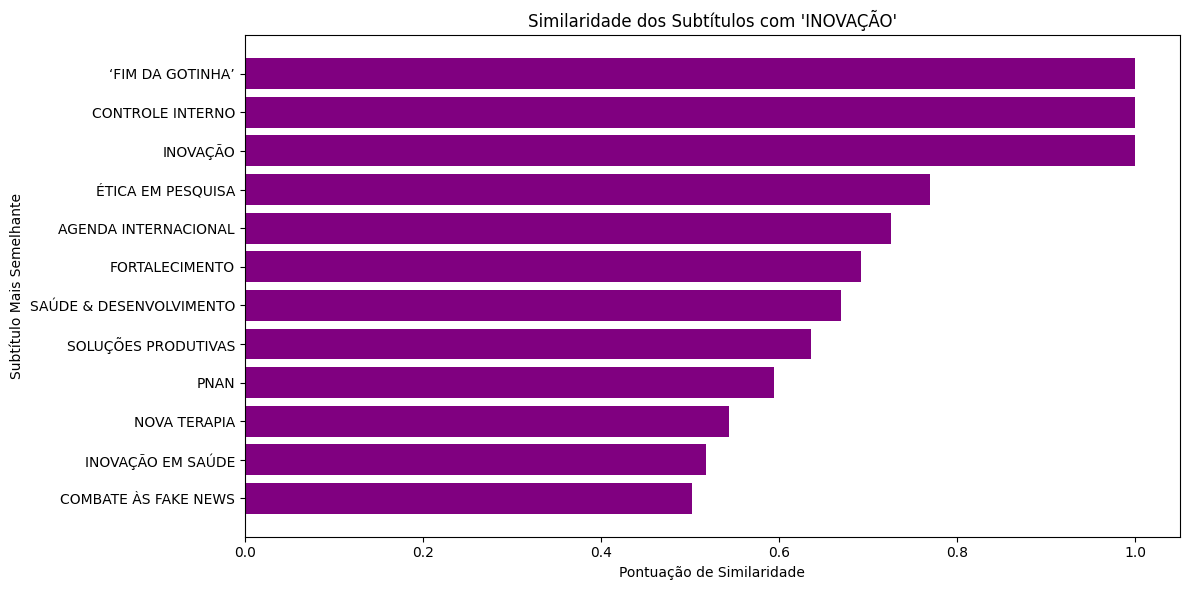

In [273]:
filtered_df = tab[tab['Subtítulo']=='INOVAÇÃO']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'INOVAÇÃO'")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Similaridade com SAÚDE MENTAL

BETS: https://www.gov.br/saude/pt-br/assuntos/noticias/2024/outubro/ministra-diz-que-vai-reforcar-acoes-nas-equipes-de-saude-da-familia-na-assistencia-a-pessoas-com-vicio-em-apostas , descrição da notícia: Nísia Trindade participou de reunião com presidente Lula e outros ministros para tratar dos impactos das bets na saúde e na economia. Segundo a ministra, jogos são um grave problema de saúde pública no Brasil e no mundo.

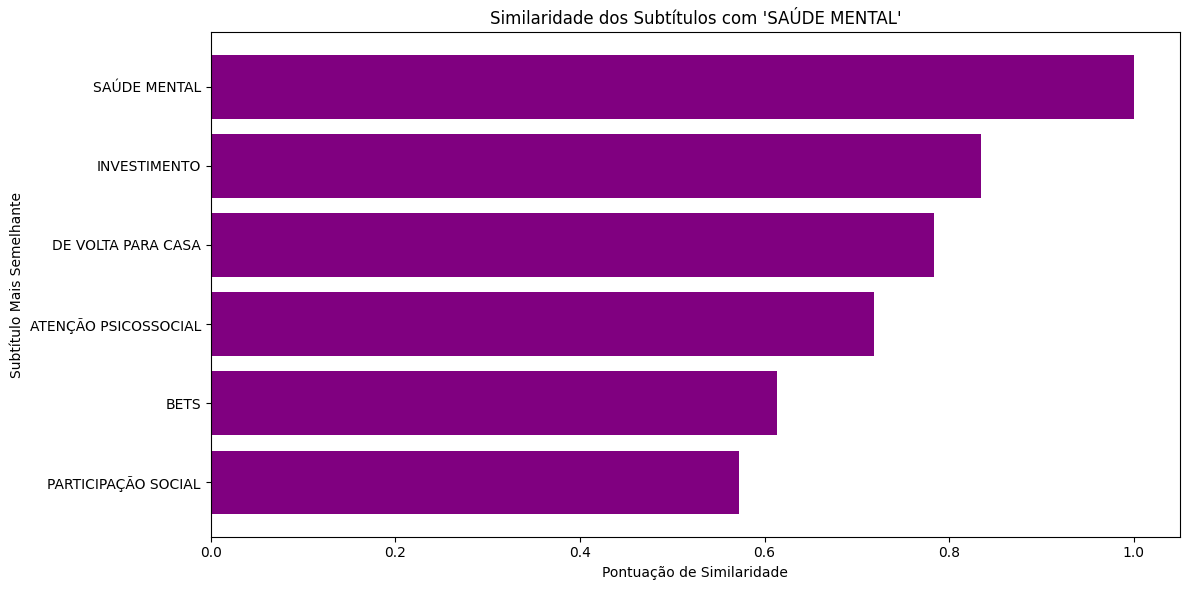

In [274]:
filtered_df = tab[tab['Subtítulo']=='SAÚDE MENTAL']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'SAÚDE MENTAL'")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Palavras mais frequentes no TEXTO , DEXCRIÇÃO E TITULO

In [275]:
texts = []
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        texto = data.get("texto", "").strip()  # Obter o texto
        if texto:
            texts.append(texto)


In [297]:
from nltk.corpus import stopwords
import nltk

# Baixar stopwords em português
nltk.download("stopwords")

# Stopwords em português
stop_words_pt = stopwords.words("portuguese")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [302]:
stop_words_pt = stopwords.words('portuguese') #retorna uma lista de palavras comuns em português que são frequentemente removidas em tarefas de processamento de texto
vectorizer = CountVectorizer(stop_words=stop_words_pt, lowercase=True) #lowercase=True: transforma todos os textos em letras minúsculas antes de realizar a análise.

X = vectorizer.fit_transform(texts)
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

In [303]:
word_freq_text = pd.DataFrame(zip(words, word_counts), columns=["Palavra", "Frequencia"])

# Ordenar por frequência (do maior para o menor)
word_freq_text = word_freq_text.sort_values(by="Frequencia", ascending=False)


In [304]:
print(word_freq_text.head(20))

             Palavra  Frequencia
25258          saúde       20016
18375     ministério        4847
26537            sus        3603
18989       nacional        3567
5053          brasil        2854
21867      população        2333
2709            além        2316
4493           ações        2289
25972          sobre        2202
21446        pessoas        2103
4046         atenção        1864
18842     municípios        1791
18310            mil        1777
22649       programa        1737
22628  profissionais        1694
27253       trabalho        1557
13057        federal        1521
18320        milhões        1520
20970           país        1505
1677          acesso        1489


## Fazer o mesmo mas agora com a DESCRIÇÃO

In [283]:
descricao_list = []

# Ler todos os arquivos JSON e extrair as descrições
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        descricao = data.get("descricao", "").strip()  # Obter a descrição
        if descricao:  # Adicionar apenas se a descrição não estiver vazia
            descricao_list.append(descricao)


stop_words_pt = stopwords.words('portuguese') #retorna uma lista de palavras comuns em português que são frequentemente removidas em tarefas de processamento de texto
vectorizer = CountVectorizer(stop_words=stop_words_pt, lowercase=True)

X = vectorizer.fit_transform(descricao_list)
word_counts = X.sum(axis=0).A1

words = vectorizer.get_feature_names_out()
word_freq_descricao = pd.DataFrame(zip(words, word_counts), columns=["Palavra", "Frequencia"])
word_freq_descricao = word_freq_descricao.sort_values(by="Frequencia", ascending=False)

print(word_freq_descricao.head(20))


            Palavra  Frequencia
4912          saúde         991
3555     ministério         291
5145            sus         202
3672       nacional         164
4354  profissionais         158
2375         evento         157
3541            mil         156
937           ações         152
1033         brasil         152
5046          sobre         149
3646     municípios         146
3543        milhões         144
4013          pasta         136
3710          nesta         128
4164      população         124
4360       programa         122
3551       ministra         113
4098        pessoas         113
2027         doença         112
4027           país         111


## E TÍTULO

In [305]:
titulo_list = []

# Ler todos os arquivos JSON e extrair as descrições
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        titulo = data.get("titulo", "").strip()  # Obter a descrição
        if titulo:  # Adicionar apenas se a descrição não estiver vazia
            titulo_list.append(titulo)


stop_words_pt = stopwords.words('portuguese') #retorna uma lista de palavras comuns em português que são frequentemente removidas em tarefas de processamento de texto
vectorizer = CountVectorizer(stop_words=stop_words_pt, lowercase=True)

X = vectorizer.fit_transform(titulo_list)
word_counts = X.sum(axis=0).A1

words = vectorizer.get_feature_names_out()
word_freq_titulo = pd.DataFrame(zip(words, word_counts), columns=["Palavra", "Frequencia"])
word_freq_titulo = word_freq_titulo.sort_values(by="Frequencia", ascending=False)

print(word_freq_titulo.head(20))


            Palavra  Frequencia
2966          saúde        1282
2120     ministério         594
3095            sus         293
3051          sobre         205
2205       nacional         183
612          brasil         177
2116       ministra         117
902          contra         110
1032         dengue         103
2112        milhões          99
552           ações          96
1541          força          96
2260          nísia          86
2109            mil          83
2254           novo          78
2605       programa          77
2905            rio          76
2602  profissionais          74
2780        reforça          68
2501      população          66


In [286]:
len(titulo_list)

2100

## Extrair nomes próprios dos textos

Inspiração: https://github.com/rmaacario/Processamento-de-Linguagem-Natural-em-Portugues-com-Redes-Neurais-I/blob/main/01_Spacy.ipynb

In [ ]:
#%pip install spacy -U

In [ ]:
# !python -m spacy download pt_core_news_sm

In [288]:
import spacy
import pt_core_news_sm
spacyPT = pt_core_news_sm.load()

In [289]:
spacy.__version__

'3.7.5'

In [291]:
# Supondo que 'texts' seja uma lista de textos
nomes_proprios = set()

# Processando cada texto individualmente
for texto in texts:
    # Processando o texto com o modelo SpaCy
    doc = spacyPT(texto)

    # Identificando entidades e filtrando os nomes próprios
    for entidade in doc.ents:
        if entidade.label_ == "PER":  # Verifica se a entidade é uma pessoa
            nomes_proprios.add(entidade.text)

print(nomes_proprios)


{'Farmanguinhos', 'Neonatal', 'Reitero', 'PCDT', 'Nilton Pereira Junior', 'Wellington Mendes Carvalho', 'Década', 'Amadeu Albino', 'Tomei', '“i', 'Edson Oliveira', 'Emmanuel Macron', 'Vanessa Lora', 'Experiências', 'Érica Quinaglia', 'lamivudina', 'Ênio Bezerra', 'pelaSecretaria de Atenção Primária à', 'Conselhos Locais de Saúde', 'Cruz', 'Guiomar Elvira Vasconcelos', 'André Abreu', 'Fernanda Benvenutty', 'Marcos Olivieri', 'Taynná Vernalha', 'Catàmjê', 'Luís Eduardo Batista', 'Alexandre Ernesto Silva', 'Diana de Paula Carvalho', 'Michelle Cunha', 'RESEX Rio Xingu', 'Helvécio Miranda', 'Edward Bach', 'Jéssica Pignatel', 'Embrapa', 'Nathalia Panzariello', 'Mundo Sano', 'Desmad', 'Walciley Oliveira Duarte', 'Lucas Felipe Carvalho Oliveira', 'Ana Maria N Vasconcelos', 'asfake news', 'Barbosa', 'Paulo Paim', 'Leany Lemos', 'Bahiafarma', 'Renato Santos', 'Amanj Kurdi', 'Ivan', 'Regis Spindola', 'Coordenadora do Coletivo de Saúde da CONAQ', 'Zalika Farmacêutica', 'Lívia Mello', 'Dr. Cristian

In [299]:
len(nomes_proprios) #3227

3227

In [292]:
# Supondo que 'texts' seja uma lista de descricao
nomes_proprios_descricao = set()

# Processando cada descricao individualmente
for descricao in descricao_list:
    # Processando o descricao com o modelo SpaCy
    doc = spacyPT(descricao)

    # Identificando entidades e filtrando os nomes próprios
    for entidade in doc.ents:
        if entidade.label_ == "PER":  # Verifica se a entidade é uma pessoa
            nomes_proprios_descricao.add(entidade.text)

print(nomes_proprios_descricao)


{'Atuando', 'Zilda Arns', 'Recurso', 'Comissão Intergestores Tripartite', 'Reforço', 'Apoio', 'Plataforma', 'Direitos Humanos', 'Damião Ximenes Lopes', 'Dom Mauro Morelli', 'Delegações', 'Secretário de Atenção Primária', 'Colegiado', 'Chagas', 'Gestores', 'Brand Persona', 'Maria Odilia Teixeira', 'Sétimo', 'Pacientes', 'Síndrome Respiratória Aguda Grave', 'Aedes', 'Felipe da Silva Veloso', 'Elizabeth', 'Norma', 'Karim Halawi', 'Rodrigo Stabeli', 'Acordo', 'Serão', 'Ministério', 'Comitê', 'Sonia Guajajara', 'Voluntárias', 'Qdenga', '“Enem', 'Wolbachia', 'Workshop', 'Anielle Franco', 'Mobilização', 'Fator VII', 'Proposta', 'Distritos Sanitários Especiais Indígenas', 'Secretário Felipe Proenço', 'Hallyson Leno', 'Igualdade Racial', 'Secretarias', 'Cirurgias', 'Cármen Lúcia', 'Aedes Aegypti', 'Espaço', 'Secretaria de Ciência e Tecnologia', 'Carlos Gadelha', 'Adolescentes', 'Sistemas de Saúde Resiliente', 'Vivek Lal', 'Valor', 'Rivaldo Cunha', 'Siops', 'Anúncio', 'e-Multi', 'FNS', 'Maria El

In [293]:
len(nomes_proprios_descricao)

205

In [300]:
nomes_proprios_titulo = set()

# Processando cada descricao individualmente
for titulo in titulo_list:
    # Processando o descricao com o modelo SpaCy
    doc = spacyPT(titulo)

    # Identificando entidades e filtrando os nomes próprios
    for entidade in doc.ents:
        if entidade.label_ == "PER":  # Verifica se a entidade é uma pessoa
            nomes_proprios_titulo.add(entidade.text)

print(nomes_proprios_titulo)


{'Zilda Arns', 'Michael Marmot', 'Plataforma', 'Dom Mauro Morelli', 'Chagas', 'Simpósio de Pesquisa', 'Pacientes', 'Carlos Alberto Trindade', 'Boas Práticas', 'Thiago Mendonça', 'Aedes', 'Zé Gotinha', 'Ministério', 'Alzheimer', 'Planos de Saúde', 'Mosquito Aedes', 'Workshop', 'Memorando de Entendimento', 'Dr. Antônio Carlos Figueira', 'Indígenas Wajãpi', 'Walciley Oliveira Duarte', 'Ivone Lara', 'Sanitário Yanomami', 'Sistemas Alimentares', 'Karen Nogueira', 'Diagnóstico', 'Polo Base de Auaris', 'Simpósio', 'Genomas SUS', 'Jarbas Barbosa', 'Comunidades Compassivas', 'Força-Tarefa de Finanças', 'Gestores de Saúde', 'FNS', 'Documentário', 'Representantes', 'R$', 'Enem dos Concursos', 'Vacina', 'Maria Abadia de Souza Kobelus', 'Casa da Gestante', 'Piso', 'Voos', 'Dignidade Menstrual', 'Censo das Unidades Básicas de Saúde', 'Planos Estaduais de Doação e Transplantes', 'Secretária Ethel', 'presidente Lula', 'Forma SUS', 'Guia Alimentar', 'Secretário de Atenção Especializada', 'Cnaids', 'Edu

In [301]:
len(nomes_proprios_titulo)

107

* Dos nomes próprios identificados no textos foram apenas 3227 e ele não acertou alguns nomes como PCDT, Neonatal,Década, etc.

* Dos nomes prórpios identificados na titulo foram apenas 205 nomes e alguns não fazem sentido como Atuando,Recurso,Apoio, Delegações, Colegiado, etc.

* Dos nomes prórpios identificados na titulo foram apenas 107 nomes e alguns não fazem sentido como Plataforma, Simpósio de Pesquisa, Pacientes, Planos de Saúde, etc, imagino que seja porque **eles estão com letras maiusculas.**